<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications/blob/main/485_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Machine Learning

In this tutorial, you will be introduced to the world of Machine Learning (ML) with Python. Machine Learning evolved from computer science that primarily studies the design of algorithms that can learn from experience. To learn, they need data that has certain attributes based on which the algorithms try to find some meaningful predictive patterns. Majorly, ML tasks can be categorized as concept learning, clustering, predictive modeling, etc. The ultimate goal of ML algorithms is to be able to take decisions without any human intervention correctly. Predicting the stocks or weather are a couple of applications of machine learning algorithms.

Let's talk more about the data and the learning process.

> **Supervised learning**, in which the training data consists of a set of input vectors x and the corresponding target values, aka labels.

> **Unsupervised learning**, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization.


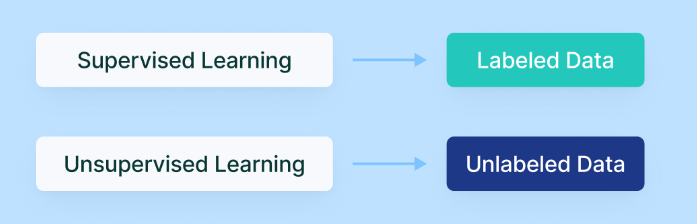






In machine learning, data can be categorized into two main types based on the number of classes or categories they possess: binary and multiclass data.

> **Binary Data:**

Binary data refers to datasets where each sample belongs to one of two classes or categories.
Common examples of binary classification tasks include:
- Spam detection (classifying emails as spam or not spam).
- Medical diagnosis (detecting the presence or absence of a disease).
- Sentiment analysis (classifying text as positive or negative sentiment).

> **Multiclass Data:**

Multiclass data refers to datasets where each sample can belong to one of more than two classes or categories.
Common examples of multiclass classification tasks include:
- Handwritten digit recognition (classifying images of digits 0 through 9).
- News categorization (assigning articles to topics such as sports, politics, or technology).
- Species classification (identifying the species of animals based on their characteristics).


**Balanced and Imbalanced Data**

Balanced and unbalanced data refer to the distribution of classes within a dataset. In a balanced dataset, each class is represented by roughly the same number of samples, while in an unbalanced dataset, one or more classes are significantly more prevalent than others. The class imbalance can pose challenges for machine learning models, particularly in classification tasks, as they may become biased towards the majority class and perform poorly on minority classes.

Techniques like oversampling (replicating samples from minority classes) and undersampling (removing samples from majority classes) can balance the class distribution.

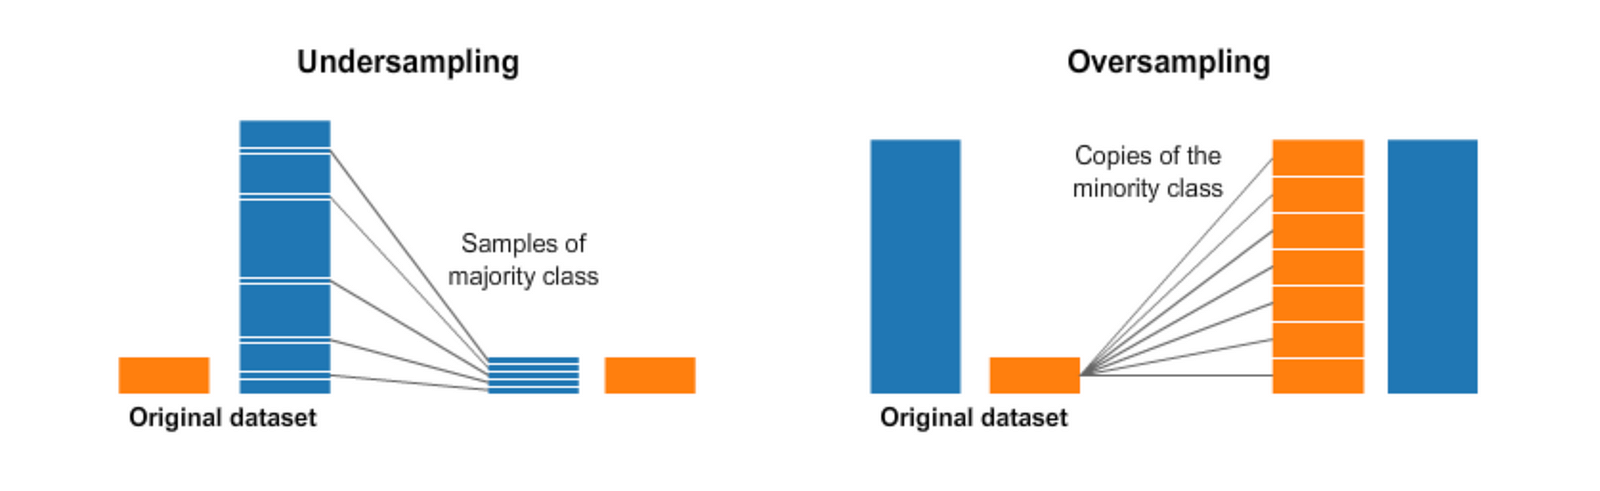

Machine Learning problems fall into a few categories:

> **Classification:** samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

> **Clustering:** Clustering is a form of unsupervised learning where the algorithm tries to group similar data points together based on their characteristics or features.

> **Regression:** if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

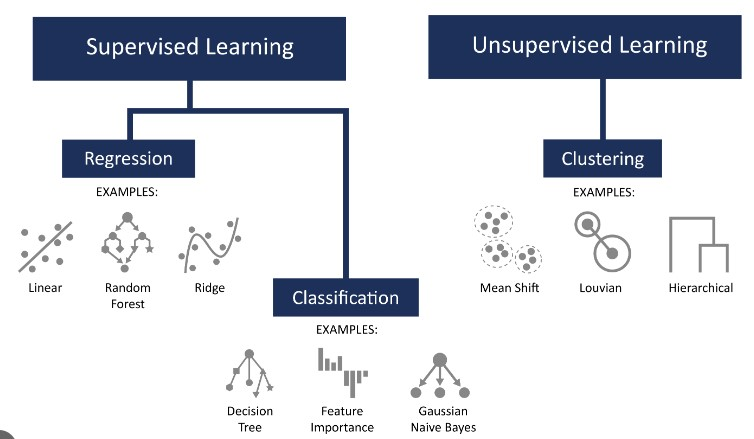

# A practical example with scikit-learn library (sklearn)

We're going to implement something called K-Nearest Neighbors (KNN) on a dataset called Iris using sklearn library. The Iris dataset is a famous dataset often used for practice. It's about different types of iris flowers. Our job is to use KNN to look at these features and predict which species a new iris flower belongs to. It's like having a bunch of examples of different iris flowers and trying to guess which species a new one belongs to based on how similar it is to the examples we have. Let's give it a shot! 💐


> **Sklearn** is a machine learning python library that is widely used for data-science related tasks. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means, KNN, etc.. Under sklearn you have a library called datasets in which you have multiple datasets that can be used for different tasks including the Iris dataset, all these datasets can be loaded out of the box. It is pretty intuitive and straightforward. So, let's quickly load the iris dataset.

load_iris has both the data and the class labels for each sample. Let's quickly extract all of it.

In [ ]:
from sklearn.datasets import load_iris

data = load_iris().data

Iris data set consists of 150 samples having **three classes** namely,

> 1.   Iris-Setosa,
2.   Iris-Versicolor,
3.   Iris-Virginica,

and **four features/attributes** that contribute to uniquely identifying as one of the three classes namely,

> 1. sepal-length,
2. sepal-width,
3. petal-length,
4. petal-width.

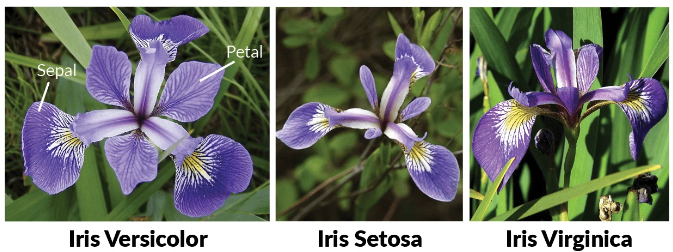

In [ ]:
data = load_iris().data
print(data.shape)

labels = load_iris().target
print(labels.shape)
print(labels)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Create the input dataset

Now, you have to combine the data and the class labels to form your input dataset. Since data is a 2-d array, you will have to reshape the labels also to a 2-d array, and for that, you will use an excellent python library called NumPy. NumPy adds support for large, multi-dimensional arrays and matrices, along with an extensive collection of high-level mathematical functions to operate on these arrays. So, let's quickly import it!*italicized text*

In [ ]:
import numpy as np

labels = np.reshape(labels,(150,1)) # reshape the labels to a column vector
print(labels.shape)
data = np.concatenate([data,labels],axis=-1) # concatenate based on the second dimension to combine the data and the class labels

(150, 1)


Next, you will import python's data analysis library called pandas which is useful when you want to arrange your data in a tabular fashion and perform some operations and manipulations on the data. In particular, it offers data structures and operations for manipulating numerical tables and time series.

In [ ]:
import pandas as pd

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.DataFrame(data,columns=names)

Before you dive any further, remember that the labels variable has class labels as numeric values, but you will convert the numeric values as the flower names or species.

For doing this, you will select only the class column and replace each of the three numeric values with the corresponding species. You will use inplace=True which will modify the data frame dataset.

In [ ]:
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)

# Analyze your Data

In [ ]:
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Check the number of samples in each class.

In [ ]:
from collections import Counter

# Convert NumPy array to list
labels_list = list(labels)

# Count the number of samples in each class
class_labels, class_counts = np.unique(labels, return_counts=True)

# Print the class counts
for class_label, count in zip(class_labels, class_counts):
    print(f"Class {class_label}: {count} samples")

Class 0: 50 samples
Class 1: 50 samples
Class 2: 50 samples


# Correlations between the data

Let's visualize the data that you loaded above using a scatterplot to find out how much one variable is affected by the other variable or let's say how much correlation is between the two variables.

We will use matplotlib library to visualize the data using a scatterplot.

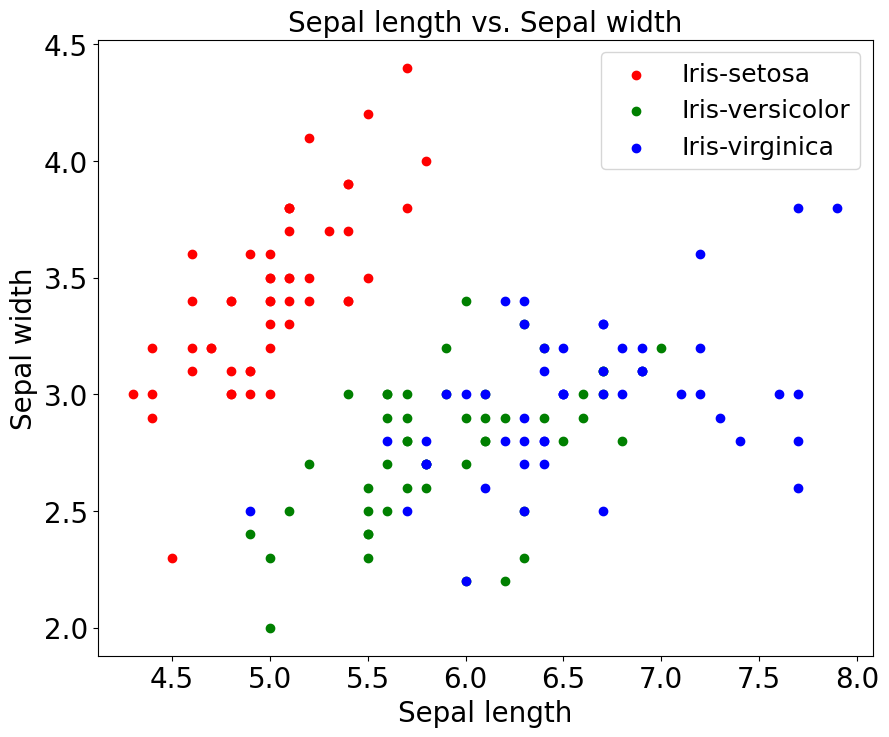

In [ ]:
import matplotlib.pyplot as plt

plt.figure(4, figsize=(10, 8))

plt.scatter(data[:50, 0], data[:50, 1], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 0], data[50:100, 1], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 0], data[100:, 1], c='b',label='Iris-virginica')

plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()


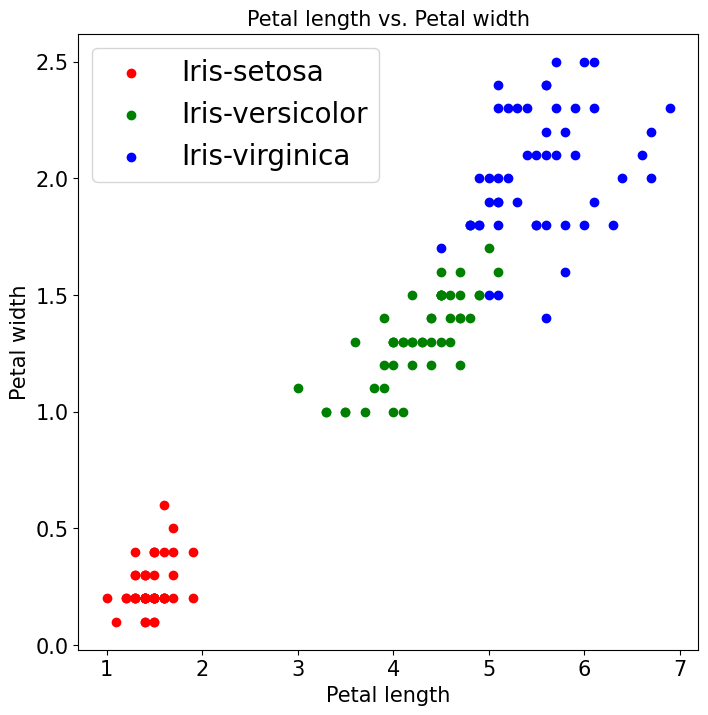

In [ ]:
plt.figure(4, figsize=(8, 8))

plt.scatter(data[:50, 2], data[:50, 3], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 2], data[50:100, 3], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 2], data[100:, 3], c='b',label='Iris-virginica')
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.legend(prop={'size': 20})
plt.show()


# Data preprocessing

After having loaded the data and analyzed it extensively, it is time to prepare your data which you can then feed to your ML model.

##Data Normalization

Why or when do you need to normalize your data? And do you need to standardize the Iris data?

Well, the answer is pretty much all the time. Normalization is a process of scaling numerical features to a standard range to ensure that each feature contributes equally to the analysis and it is crucial when the data you have is not consistent. You can check for inconsistency by using the **describe()** function which will give you max and min values. If the max and min values of one feature are significantly larger than the other feature then normalizing both the features to the same scale is very important.

In Iris data, normalization ***is not required***.

Let's print the describe() function again and see why you do not need any normalization.

In [ ]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


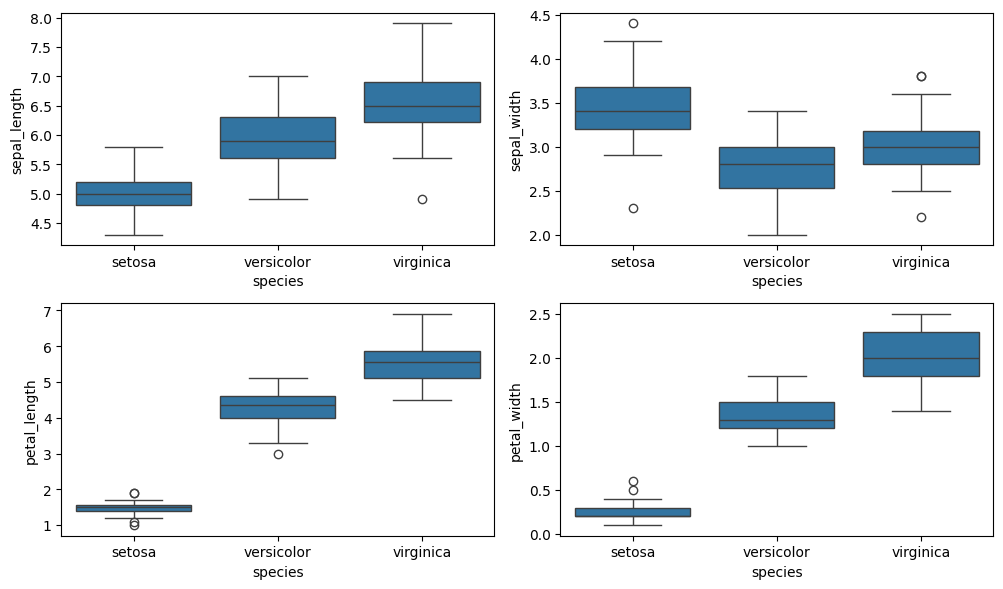

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Create boxplots
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=iris)
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=iris)

plt.tight_layout()
plt.show()

Let's assume though that normalization is needed. One common method for normalization is Min-Max scaling, where each feature is scaled to the range [0, 1] based on its minimum and maximum values. For this purpose we will use the MinMaxScaler from sklearn.preprocessing library.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Extract numerical features
numerical_features = dataset.drop('species', axis=1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization
normalized_data = scaler.fit_transform(numerical_features)

# Convert the normalized data back to DataFrame
normalized_dataset = pd.DataFrame(normalized_data, columns=numerical_features.columns)

# Concatenate the normalized features with the 'species' column
normalized_dataset['species'] = dataset['species']

In [ ]:
normalized_dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


# Overfitting

In data-science, you will often come across a term called Overfitting which means that your model has learned the training data very well but fails to perform on the testing data.

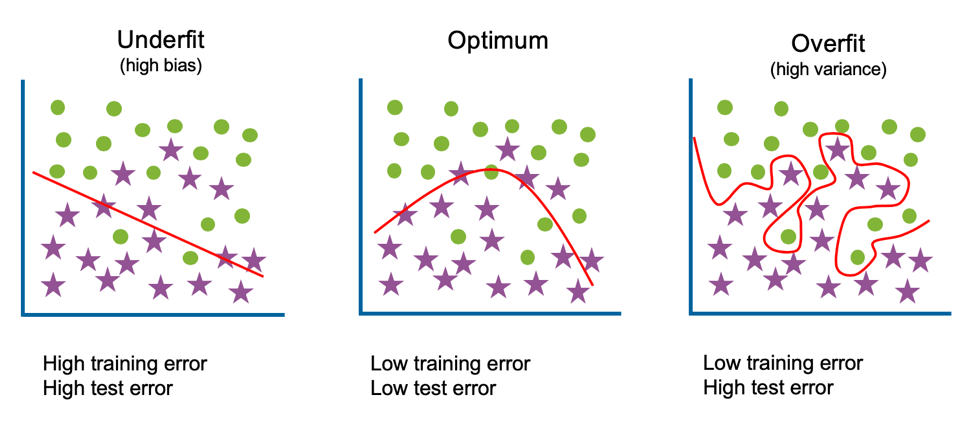

#Splitting the data

Splitting the data into training, testing and validation set will often help you to know whether your model is overfitting or not to make sure that the model can generalize well on the testing data.

Coming back to the Iris data, you have 150 samples, you will be training your ML model on 80% of the data, 10% of the data will be used for validation and the remaining 10% for testing.

**Having separate validation and test sets ensures unbiased model evaluation, helps prevent overfitting during hyperparameter tuning, and provides a reliable estimate of the model's generalization performance on unseen data. This practice is essential for building robust and reliable machine learning models.**

For training and testing set split, we will use the sklearn library which has an in-built splitting function called train_test_split. So, let's split the data.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% test
train_data, test_data, train_label, test_label = train_test_split(dataset.iloc[:,:3], labels, test_size=0.2, random_state=42, shuffle=True)

# Split the remaining 20% into half for validation and half for testing
val_data, test_data, val_label, test_label = train_test_split(test_data, test_label, test_size=0.5, random_state=42, shuffle=True)

#Note that the random_state is a seed that takes a random_state as input if you change the number the split of the data will also change.
#However, if you keep the random_state same and run the cell multiple times the data splitting will remain unchanged.

train_data.shape,train_label.shape,test_data.shape,test_label.shape

((120, 3), (120, 1), (15, 3), (15, 1))

# The KNN Model

After all the loading, analyzing and preprocessing of the data, it is now time when you will feed the data into the KNN model. To do this, you will use sklearn's inbuilt function neighbors which has a class called KNeigborsClassifier in it.

**What is a k-Nearest Neighbor?**

The KNN or k-nearest neighbor algorithm is a supervised learning algorithm, by supervise it means that it makes use of the class labels of training data during the learning phase. It is an instance-based machine learning algorithm, where new data points are classified based on stored, labeled instances (data points). KNN can be used both for classification and regression; however, it is more widely used for classification purposes.

The k in KNN is a crucial variable also known as a ***hyperparameter*** that helps in classifying a data point accurately. More, precisely, the k is the number of nearest neighbors you wish to take a vote from when classifying a new data point.

So, let's quickly understand it in the following ways:

- Firstly, you load all the data and initialize the value of k,

- Then, the distance between the stored data points and a new data point that you want to classify is calculated using various similarity or distance metrics like Manhattan distance (L1), Euclidean distance (L2), Cosine similarity, Bhattacharyya distance, Chebyshev distance, etc.

- Next, the distance values are sorted either in descending or ascending order and top or lower k-nearest neighbors are determined.

- The labels of the k-nearest neighbors are gathered, and a majority vote or a weighted vote is used for classifying the new data point. The new data point is assigned a class label based on a certain data point that has the highest score out of all the stored data points.

- Finally, the predicted class for the new instance is returned.
The prediction can be of two types: either classification in which a class label is assigned to a new data point or regression wherein a value is assigned to the new data point.

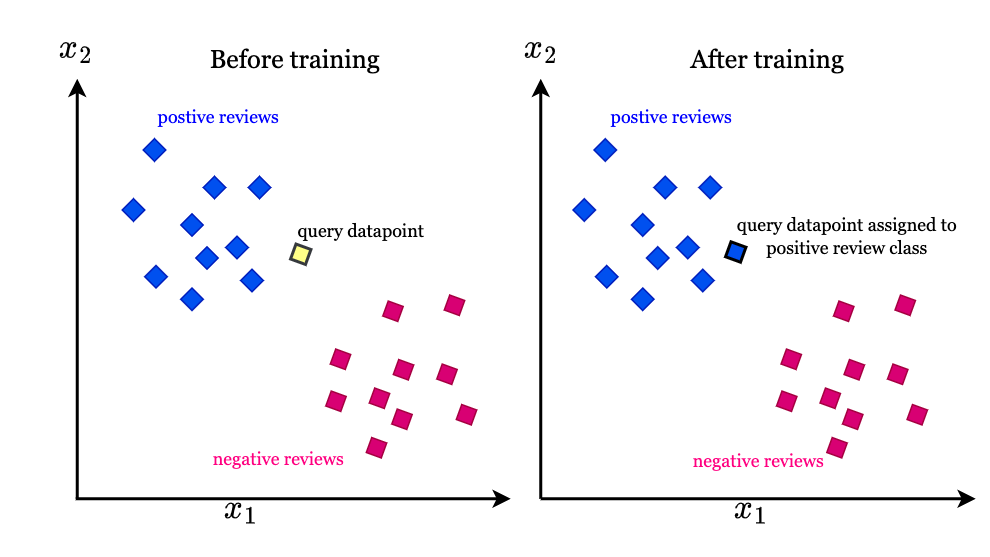


Let's start by importing the classifier.




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter tuning

In order to decide the best value for hyperparameter k, we will do something called grid-search. We will train and test your model on different k values and finally use the one that gives you the best results.

Let's initialize a variable neighbors (k) which will have values ranging from 1-9 and two numpy zero matrices namely train_accuracy and validation_accuracy each for training and validation accuracy. We will need them later to plot a graph to choose the best neighbor value.

In [ ]:
neighbors = np.arange(1,9)
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

Next piece of code is where all the magic will happen!

In [ ]:
for i,k in enumerate(neighbors):

    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(train_data, np.ravel(train_label))

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)

    #Compute accuracy on the validation set
    test_accuracy[i] = knn.score(val_data, val_label)


Let's plot the results for each k.

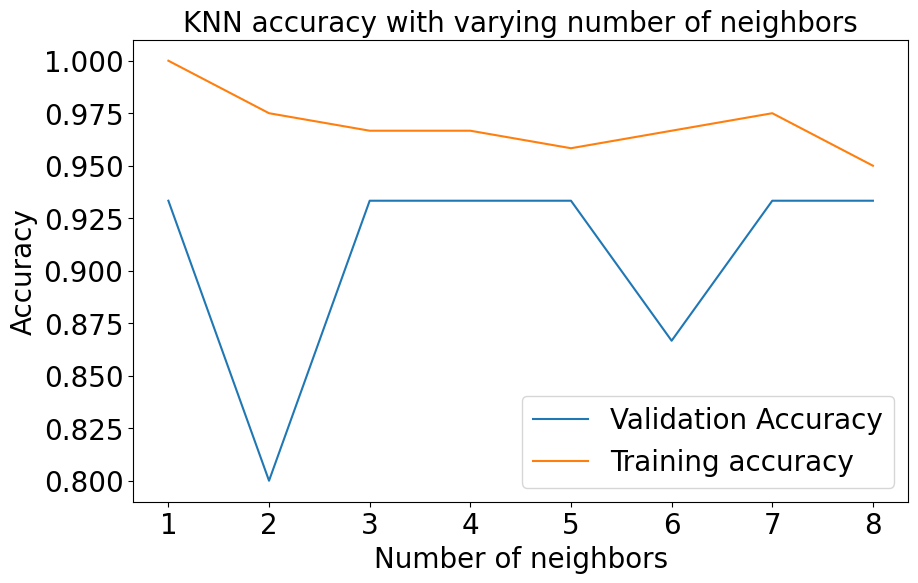

In [ ]:
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Validation Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


# Training the model with optimal k

Now that we know the optimal value of k we can move to the final training step.

# K-fold Cross-validation

To assess the model's robustness and generalization ability, we utilize k-fold cross-validation, which involves partitioning the dataset into k equally sized folds, iteratively training the model on k-1 folds while validating it on the remaining fold, and then averaging the performance metrics across all iterations

To do so, we will import cross_val_score from sklearn.model_selection.

In [ ]:
from sklearn.model_selection import cross_val_score

We create a KNeighborsClassifier with the optimal value of k and we use cross_val_score to perform 5-fold cross-validation (cv=5).
We compute the mean of the cross-validation scores to get the average train accuracy for the current value of k.
We also compute the accuracy on the test set after fitting the model with the current value of k.

In [ ]:
cv = 5

accuracy = np.zeros(len(neighbors))

# Optimal k value
k = 1

# Perform k-fold cross-validation for each value of k
knn = KNeighborsClassifier(n_neighbors=k)

# Perform k-fold cross-validation
cv_scores = cross_val_score(knn, data, np.ravel(labels), cv=cv)

# Compute average accuracy across folds
accuracy = np.mean(cv_scores)


# If we dind't use crossvalidation we would do the following:
# Compute accuracy on the test set
knn.fit(train_data, np.ravel(train_label))
test_accuracy = knn.score(test_data, test_label)


# Evaluating the model
In the last segment of this tutorial, you will be evaluating your model on the testing data using a couple of techniques like confusion_matrix and classification_report.

Let's first check the accuracy of the model on the testing data.



In [ ]:
print(cv_scores)
print(accuracy)
print(test_accuracy)

[1. 1. 1. 1. 1.]
1.0
1.0


# Confusion Matrix


A confusion matrix is a performance measurement for machine learning classification tasks, which allows a detailed analysis of the performance of a classification model. It is a square matrix where the rows represent the true classes and the columns represent the predicted classes.

In a binary classification task, a confusion matrix has two rows and two columns, representing the counts of true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN). These counts can be used to calculate various performance metrics such as accuracy, precision, recall, and F1-score.

Here's a breakdown of the components of a confusion matrix:

- True Positive (TP): The number of samples that were correctly classified as positive.
- True Negative (TN): The number of samples that were correctly classified as negative.
- False Positive (FP): The number of samples that were incorrectly classified as positive (also known as Type I error).
- False Negative (FN): The number of samples that were incorrectly classified as negative (also known as Type II error).

These counts help in understanding how well the model is performing in terms of correctly identifying positive and negative instances. By visualizing the confusion matrix, you can quickly identify where the model is making mistakes and which classes are being confused with each other.

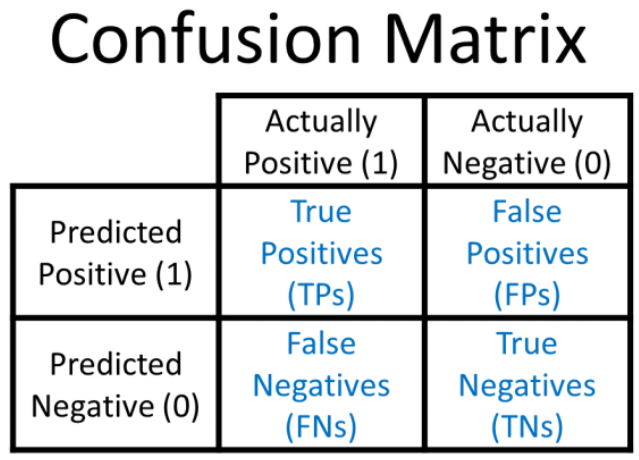

For multiclass classification tasks, the confusion matrix is generalized to have dimensions corresponding to the number of classes, with each cell representing the counts or proportions of instances belonging to specific combinations of true and predicted classes. This allows for a more detailed evaluation of the model's performance across multiple classes.

Scikit-learn provides a function that calculates the confusion matrix for you.

In [ ]:
from sklearn.metrics import confusion_matrix

#the predicted labels for the test set
predictions = knn.predict(test_data)
predictions = np.reshape(predictions,(len(predictions),1))
# predictions

cnf_matrix = confusion_matrix(test_label, predictions)

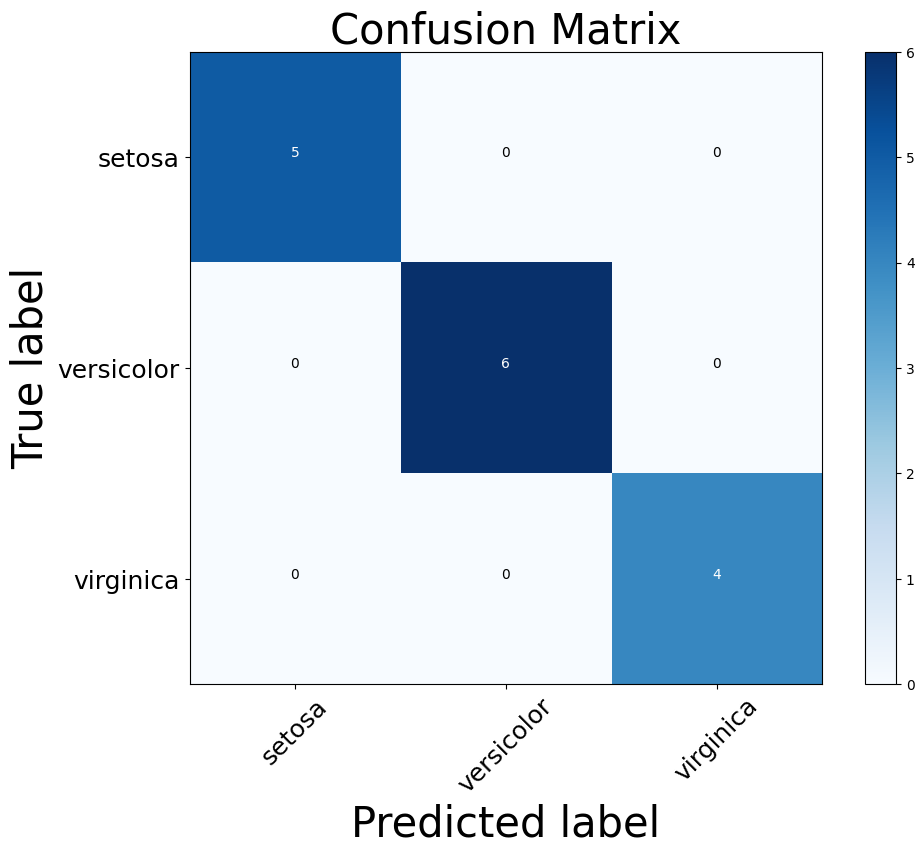

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

class_names = load_iris().target_names

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()


# Classification Report

Classification report helps in identifying the misclassified classes in much more detail by giving precision, recall and F1 score for each class. We will use the sklearn library to visualize the classification report.


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_label, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# HOMEWORK 3: Classifying Wines with Support Vector Machines (SVM)

First of all, congratulations to all those who successfully made it till the end! But this was just the start. There is still a long way to go! 🙂

The objective of this exercise is to build and evaluate a Support Vector Machine (SVM) model for classifying wines based on their chemical properties using the Wine dataset available in scikit-learn. You will explore various aspects of SVM model training and optimization, including preprocessing steps, hyperparameter tuning, and kernel selection.







#Loading the Dataset

Load the Wine dataset using load_wine from sklearn.datasets.
Inspect the dataset to understand its structure and features.

#Data Preprocessing

- Split the dataset into features and target labels.
- Split the data into training and testing sets using train_test_split from sklearn.model_selection.

# Baseline Model

Train a baseline SVM model using default hyperparameters.
Evaluate the model's performance on the testing set using metrics like accuracy, precision, recall, and F1-score. Experiment with different kernel functions (e.g., linear, polynomial, RBF) and observe their effects on model performance.

#Data Normalization

Standardize the features using StandardScaler from sklearn.preprocessing.
Explore the effects of data normalization on model performance with different normalization techniques.

#Hyperparameter Tuning

Perform hyperparameter tuning to find the best combination of hyperparameters for the SVM model.
Tune hyperparameters such as C (regularization parameter) and the choice of kernel (linear, polynomial, RBF).
Use techniques like GridSearchCV or RandomizedSearchCV from sklearn.model_selection to efficiently search through the hyperparameter space.

#Effects of Data Size

Explore the effects of varying the size of the training data on model performance.
Train SVM models using different proportions of the training data (change the number of CV folds) and observe how performance changes. Visualize the relationship between training size and model performance.

# Model Evaluation

Evaluate the final tuned SVM model on the testing set using various performance metrics.
Plot confusion matrices to visualize the model's predictions.
Discuss the results and insights gained from the experimentation.